In [127]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np
from pprint import pprint

In [128]:
str_filename = '../dune_artblocks_mints.csv'

In [129]:
fh = open(str_filename)
csv_reader = csv.reader(fh)

In [130]:
csv_reader = csv.reader(fh)
csv_header = next(csv_reader)

In [131]:
fh.close()

In [132]:
df_temp = pd.read_csv(str_filename, header=None, skiprows=1, names=csv_header)
i = 0
for row in df_temp['time']:
    row = row.replace('+00:00', '')
    row = row.replace('T', ' ')
    df_temp.at[i, 'time'] = row
    i += 1
df_temp

,time,name,eth_total,usd_total,refund_eth,refund_usd,gas_eth,project_type,projectid,tokenid,tx_hash,mint_count
0,2022-08-09 21:30:26,Gels by Jason Brown,0.15,256.4190,0.0,0.0,0.000209,Factory,322,322000132,\x657b0e82d8e891d414e853f70eedb9a3d585b6db2b4f...,1
1,2022-08-09 21:27:20,THE SOURCE CoDE by O,0.20,341.8920,0.0,0.0,0.000153,Factory,187,187000165,\xc2b38ee0431f08dfbf60c9a371eb2759af769b17b463...,1
2,2022-08-09 21:24:21,Facets by conundrume,0.10,170.6110,0.0,0.0,0.000153,Factory,249,249000222,\x5e954524f1505cb1a71cfd6580bf7d9a248e885b6b57...,1
3,2022-08-09 21:01:56,Swing by Eltono,0.15,255.0600,0.0,0.0,0.000207,Factory,184,184000249,\x10e9f2c68f9254fa1e394b0dc98bd30c34a0ad0ba81b...,1
4,2022-08-09 17:07:06,8 by Bård Ionson,0.18,304.5492,0.0,0.0,0.000159,Factory,179,179000105,\x24a35c0cbcf342fbeded159696463339b578b65fe535...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44890,2022-01-01 03:26:49,Dream Engine by REMO,0.10,373.1310,0.0,0.0,0.014069,Factory,223,223000265,\xbdc649a4b50067b30675568bd5337b0c1356c3c019c9...,1
44891,2022-01-01 02:50:44,Freehand by WAWAA,0.12,447.8640,0.0,0.0,0.014876,Factory,211,211000164,\xf379b87e7bd9d8214790fc17e564cf545aff708f71e6...,1
44892,2022-01-01 01:11:00,CryptoNewYorker by Q,0.00,0.0000,0.0,0.0,0.021243,Factory,189,189000984,\xd50846180a99ba101219e33d4eb2b425d0bcf5530994...,1
44893,2022-01-01 00:58:00,Attraction by Jos Vr,0.15,558.3630,0.0,0.0,0.013791,Factory,229,229000312,\x68d37300a53c2d1f7c683af5bb87010bde0a0027f1ad...,1


In [133]:
df_sig = df_temp.loc[(df_temp['project_type'] == 'Curated')]
df_sig['eth_total']

4744     3.000000
4745     2.858306
4746     2.858306
4747     2.868078
4748     2.809446
           ...   
44479         NaN
44480         NaN
44481         NaN
44482         NaN
44483         NaN
Name: eth_total, Length: 12750, dtype: float64

In [135]:
#df_sig = df_sig.set_index('projectid')
df_sig = df_sig.loc[(df_sig['eth_total'] > 0)]
df_sig2 = df_sig.groupby('projectid').min().reset_index()
df_mean = df_sig.groupby('projectid').mean().reset_index()
df_median = df_sig.groupby('projectid').median().reset_index()
df_sig2['eth_min'] = df_min['eth_total']
df_sig2['eth_mean'] = df_mean['eth_total']
df_sig2['eth_median'] = df_median['eth_total']
df_sig2

,projectid,time,name,eth_total,usd_total,refund_eth,refund_usd,gas_eth,project_type,tokenid,tx_hash,mint_count,eth_min,eth_mean,eth_median
0,233,2022-01-10 18:00:19,Chimera by mpkoz,2.400000,7242.624000,0.000000,0.000000,0.009990,Curated,233000001,\x000637f220fa85a957dd8a63dc020f59bfcf18384164...,1,2.400000,2.495740,2.400000
1,250,2022-01-24 18:00:57,Cosmic Reef by Leo V,0.400000,945.500000,0.000000,0.000000,0.010394,Curated,250000001,\x000c3b6983b6a4338412a018b28dd4b403105db96abe...,1,0.400000,0.752297,0.600000
2,255,2022-01-31 18:00:27,Screens by Thomas Li,1.250000,3349.500000,0.000000,0.000000,0.010727,Curated,255000001,\x006800d70b969bafa4f45bba989ab065e0034dc39e37...,1,1.250000,1.459459,1.500000
3,261,2022-02-07 18:16:55,Para Bellum by Matt,0.100000,316.996000,0.000000,0.000000,0.010025,Curated,261000001,\x00415d19d8d73996712d13528f4027b882c02b4a9a29...,1,0.100000,0.167768,0.200000
4,267,2022-02-14 18:13:03,entretiempos by Marc,0.200000,584.022000,0.000000,0.000000,0.008426,Curated,267000001,\x00a3d3050a0d2647bb99632fb80054bc18cdb1dfdab4...,1,0.200000,0.252092,0.200000
5,282,2022-03-21 17:10:53,Memories of Qilin by,0.750000,2184.375000,0.000000,0.000000,0.009008,Curated,282000001,\x00085a2b4b94a920d81c0f56287db3b1e9c501035ea1...,1,0.750000,0.803763,0.750000
6,283,2022-04-14 20:30:44,OnChainChain by Rizz,0.025000,75.410000,0.000000,0.000000,0.009361,Curated,283000001,\x001776d5a5ddd88f2ee3be1bfb9af6c9a176c4180e35...,1,0.025000,0.030178,0.025000
7,284,2022-03-29 17:29:45,Ancient Courses of F,0.300000,1019.811000,0.000000,0.000000,0.009008,Curated,284000001,\x00f3b460dec2217293e57d2397999634fd9f981f2d85...,1,0.300000,0.309159,0.300000
8,296,2022-04-18 17:19:40,Flux by Owen Moore,0.200000,594.342000,0.000000,0.000000,0.011483,Curated,296000001,\x001a3bc190ff254b4d01dd402abd2c956b5c3be962a6...,1,0.200000,0.209419,0.200000
9,304,2022-04-29 16:59:53,Anticyclone by Willi,0.750000,2126.055000,0.000000,0.000000,0.010663,Curated,304000001,\x0011d4b36a3e10dd2e9b61184f0b72ee78284f43cb7b...,1,0.750000,0.899249,1.000000


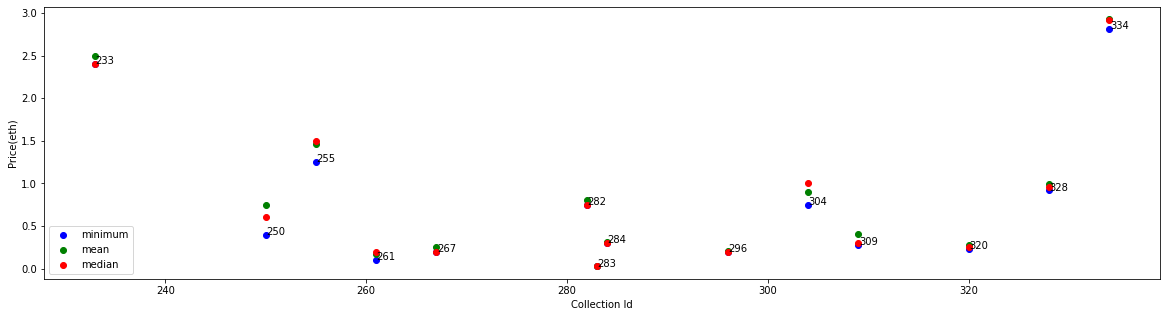

In [161]:
plt.rcParams["figure.figsize"] = (20,5)
x = df_sig2['projectid']
y = df_sig2['eth_total']
y2 = df_sig2['eth_mean']
y3 = df_sig2['eth_median']
plt.scatter(x, y ,c='blue')
plt.scatter(x, y2, c='green')
plt.scatter(x, y3, c='red')
ax = plt.gca()
for i, txt in enumerate(df_sig2.projectid):
   ax.annotate(txt, (df_sig2.projectid.iat[i]+0.05, df_sig2.eth_min.iat[i]))
legends = ["minimum", "mean", "median"]
ax.legend(legends)
plt.xlabel("Collection Id")
plt.ylabel("Price(eth)")
plt.show()